## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [2]:
df = pd.read_csv('../data/1year.arff.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


In [3]:
print df.index

RangeIndex(start=0, stop=7027, step=1)


In [4]:
print df.dtypes
df = df.apply(pd.to_numeric, errors = 'coerce')
print df.dtypes

0      object
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12    float64
13     object
14     object
15     object
16     object
17     object
18    float64
19    float64
20     object
21     object
22    float64
23     object
24     object
25     object
26     object
27     object
28     object
29    float64
       ...   
35     object
36     object
37     object
38    float64
39     object
40     object
41    float64
42    float64
43    float64
44     object
45     object
46     object
47     object
48    float64
49     object
50     object
51     object
52     object
53     object
54    float64
55    float64
56     object
57    float64
58     object
59     object
60     object
61    float64
62     object
63     object
64      int64
Length: 65, dtype: object
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     fl

In [5]:
df.isnull().sum()

0        3
1        3
2        3
3       30
4        8
5        3
6        3
7       25
8        1
9        3
10      39
11      30
12       0
13       3
14       2
15      25
16      25
17       3
18       0
19       0
20    1622
21       3
22       0
23     124
24       3
25      25
26     311
27      34
28       3
29       0
      ... 
35       3
36    2740
37       3
38       0
39      30
40      84
41       0
42       0
43       0
44     134
45      31
46      29
47       3
48       0
49      25
50       3
51      29
52      34
53      34
54       0
55       0
56       1
57       0
58       1
59     135
60      22
61       0
62      30
63      34
64       0
Length: 65, dtype: int64

In [6]:
# Count of all records containing missing data
df[df.isnull().any(axis=1)].index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
            ...
            7015, 7016, 7017, 7018, 7020, 7021, 7022, 7023, 7024, 7026],
           dtype='int64', length=3833)

In [7]:
df.dropna(thresh=10, inplace=True)
# Feature #20 and #36 have high number of missing values, hence drop them
df = df.drop(20, axis=1)
df = df.drop(36, axis=1)

In [8]:
# Distribution of missing values in 'normal' instances
df0 = df[df[64] == 0]
print df0.isnull().sum()

0       3
1       3
2       3
3      30
4       8
5       3
6       3
7      25
8       1
9       3
10      3
11     30
12      0
13      3
14      2
15     25
16     25
17      3
18      0
19      0
21      3
22      0
23    124
24      3
25     25
26    191
27     28
28      3
29      0
30      0
     ... 
34      3
35      3
37      3
38      0
39     30
40     84
41      0
42      0
43      0
44    120
45     30
46     29
47      3
48      0
49     25
50      3
51     29
52     28
53     28
54      0
55      0
56      1
57      0
58      1
59    121
60     22
61      0
62     30
63     28
64      0
Length: 63, dtype: int64


In [9]:
# Distribution of missing values in 'anomalous' instances
df1 = df[df[64] == 1]
print df1.isnull().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10     36
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
21      0
22      0
23      0
24      0
25      0
26    120
27      6
28      0
29      0
30      0
     ... 
34      0
35      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44     14
45      1
46      0
47      0
48      0
49      0
50      0
51      0
52      6
53      6
54      0
55      0
56      0
57      0
58      0
59     14
60      0
61      0
62      0
63      6
64      0
Length: 63, dtype: int64


In [10]:
# Feature #23, #26, #44 and #59 have substantial missing values, if they are not significantly correlated with target value, drop them
print df[23].corr(df[64])
print df[26].corr(df[64])
print df[44].corr(df[64])
print df[59].corr(df[64])

df = df.drop(23, axis=1)
df = df.drop(26, axis=1)
df = df.drop(44, axis=1)
df = df.drop(59, axis=1)

-0.0108074699294
-0.00465029974183
0.00269941187673
-0.0024820410241


In [11]:
# Missing values column-wise
df.isnull().sum()

0      3
1      3
2      3
3     30
4      8
5      3
6      3
7     25
8      1
9      3
10    39
11    30
12     0
13     3
14     2
15    25
16    25
17     3
18     0
19     0
21     3
22     0
24     3
25    25
27    34
28     3
29     0
30     0
31    38
32    30
33    25
34     3
35     3
37     3
38     0
39    30
40    84
41     0
42     0
43     0
45    31
46    29
47     3
48     0
49    25
50     3
51    29
52    34
53    34
54     0
55     0
56     1
57     0
58     1
60    22
61     0
62    30
63    34
64     0
dtype: int64

In [12]:
# Impute with mean of column values
df = df.fillna(df.mean())

In [13]:
# Rename columns
df.columns = range(0,59)

In [14]:
X = df.iloc[:, 0:58].values
X

array([[  2.00550000e-01,   3.79510000e-01,   3.96410000e-01, ...,
          8.26580000e+01,   4.41580000e+00,   7.42770000e+00],
       [  2.09120000e-01,   4.99880000e-01,   4.72250000e-01, ...,
          1.07350000e+02,   3.40000000e+00,   6.09870000e+01],
       [  2.48660000e-01,   6.95920000e-01,   2.67130000e-01, ...,
          1.34270000e+02,   2.71850000e+00,   5.20780000e+00],
       ..., 
       [  6.33800000e-03,   5.02760000e-01,   4.39230000e-01, ...,
          5.10190000e+01,   7.15420000e+00,   6.20010000e+01],
       [ -4.16430000e-02,   8.48100000e-01,  -1.28520000e-01, ...,
          2.61850000e+02,   1.39390000e+00,   5.10050000e-01],
       [  1.49460000e-02,   9.46480000e-01,   3.21100000e-02, ...,
          1.08640000e+02,   3.35990000e+00,   3.51180000e+01]])

In [15]:
y = df.iloc[:, 58:59].values
y = y.ravel()
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [16]:
# All normal instances
y[:6756]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
# All anomalous instances
y[6756:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Exploratory Data Analysis

NEAREST NEIGHBOR BASED ANOMALY DETECTION TECHNIQUES  
* Assumption: Normal data instances occur in dense neighborhoods, while anomalies occur far from their closest neighbors. 


CLUSTERING BASED ANOMALY DETECTION TECHNIQUES  
* Assumption: Normal data instances belong to a cluster in the data, while anomalies either do not belong to any cluster. E.g. DBSCAN  

* Assumption: Normal data instances lie close to their closest cluster centroid, while anomalies are far away from their closest cluster centroid. E.g. K-Means and EM  

* Assumption: Normal data instances belong to large and dense clusters, while anomalies either belong to small or sparse clusters. E.g. LOF

In [18]:
# Without Standardizing, perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_) 


[ 0.94469568  0.02275285]


In [19]:
x1_pca1 = X_pca[:6756,0:1].ravel()
x1_pca2 = X_pca[:6756,1:2].ravel()
x2_pca1 = X_pca[6756:,0:1].ravel()
x2_pca2 = X_pca[6756:,1:2].ravel()

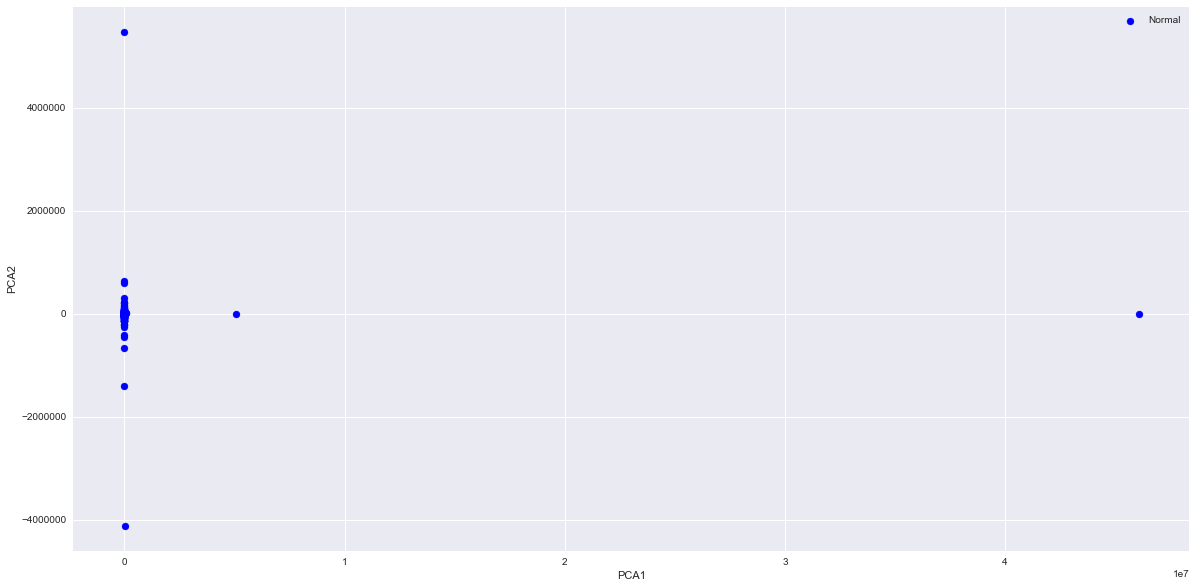

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(x1_pca1,x1_pca2,color='b',label='Normal')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

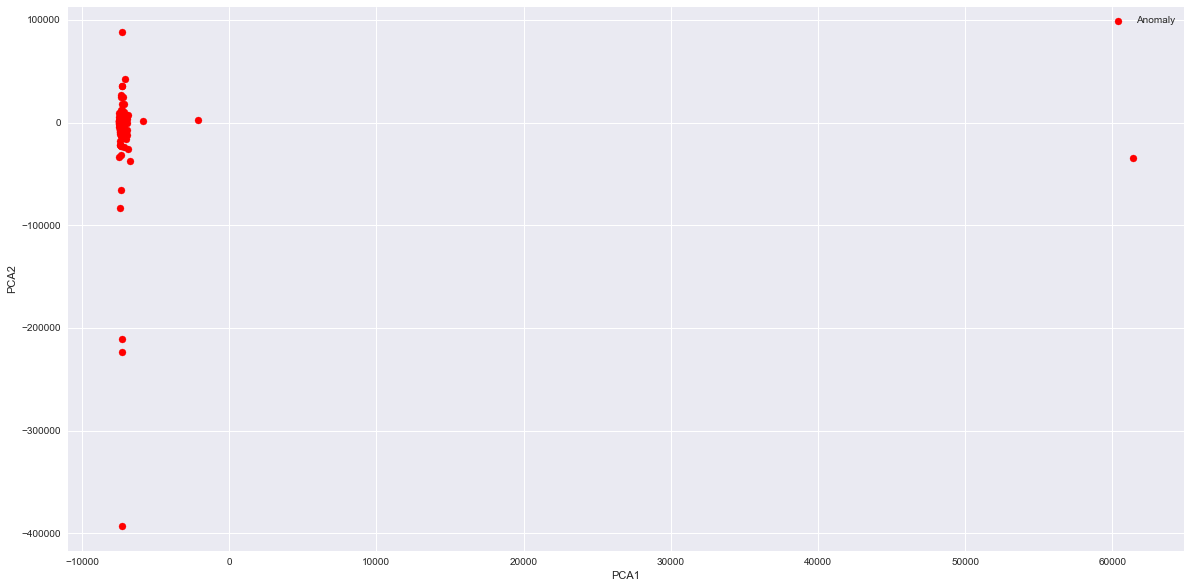

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(x2_pca1,x2_pca2,color='r',label='Anomaly')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

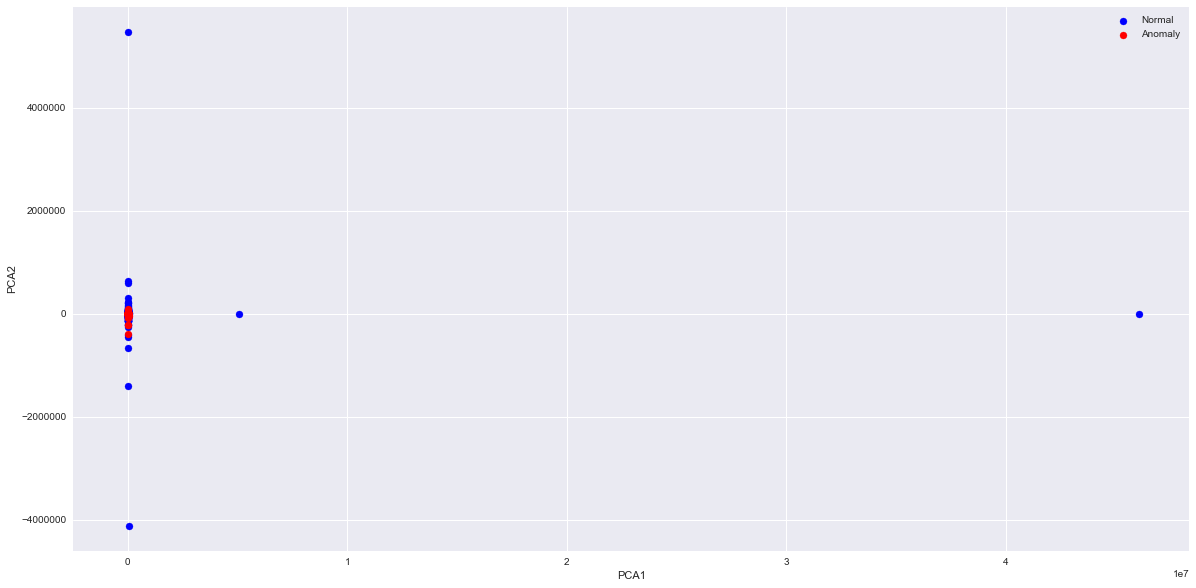

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(x1_pca1,x1_pca2,color='b',label='Normal')
plt.scatter(x2_pca1,x2_pca2,color='r',label='Anomaly')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [23]:
# Standardize and then perform PCA
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X = stdsc.fit_transform(X)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_) 

[ 0.22570329  0.14363939]


In [25]:
x1_pca1 = X_pca[:6756,0:1].ravel()
x1_pca2 = X_pca[:6756,1:2].ravel()
x2_pca1 = X_pca[6756:,0:1].ravel()
x2_pca2 = X_pca[6756:,1:2].ravel()

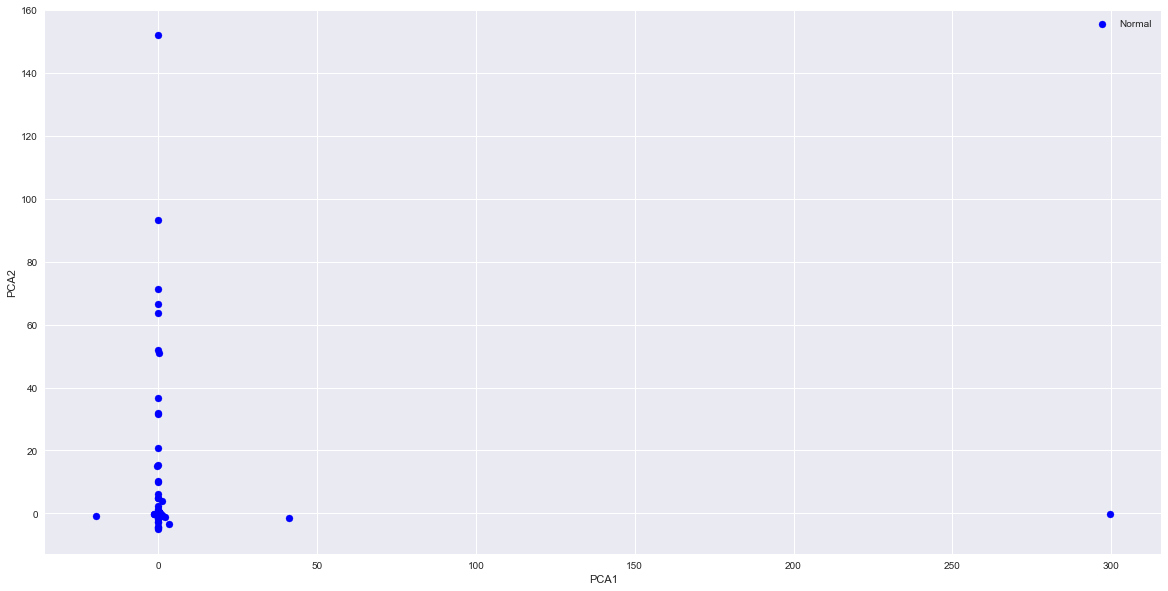

In [26]:
plt.figure(figsize=(20,10))
plt.scatter(x1_pca1,x1_pca2,color='b',label='Normal')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

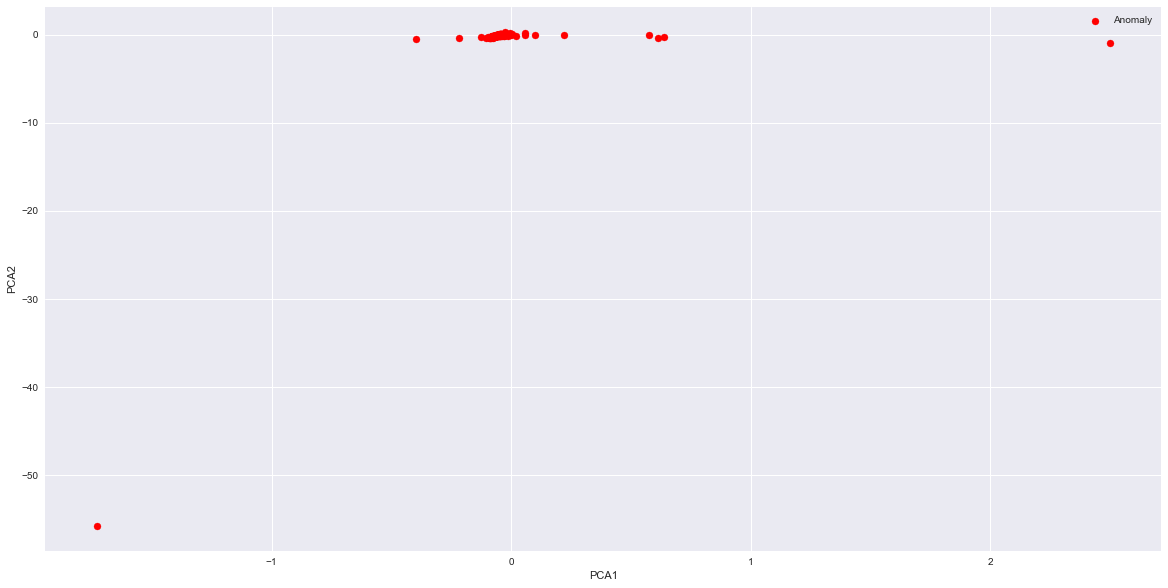

In [27]:
plt.figure(figsize=(20,10))
plt.scatter(x2_pca1,x2_pca2,color='r',label='Anomaly')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

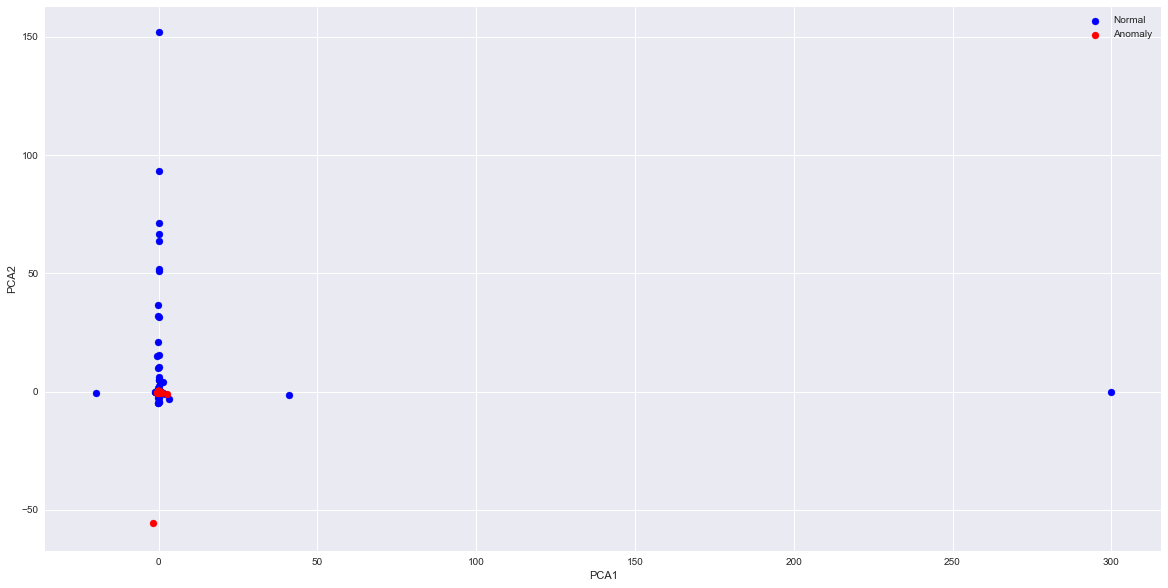

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(x1_pca1,x1_pca2,color='b',label='Normal')
plt.scatter(x2_pca1,x2_pca2,color='r',label='Anomaly')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

From the above exploration of data, we can infer that:  

* Centroid-based clustering won't work as anomalous instances do not form a 'spherical' cluster
* Density-based clustering might work as anomalous instances form clusters of arbitrary shape. However, it might not be the best way of identifying outliers as normal and anomalous instances densities overlap considerably.
* OneClassSVM, a semi-supervised technique, may be a better alternative, as it is immune to distribution of data

## DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.35, min_samples=500).fit(X)
pred_labels = db.labels_
true_labels = y

In [30]:
n_clusters_ = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
n_clusters_

1

In [31]:
print len(set(pred_labels))
print set(pred_labels)
print pred_labels.shape
print np.unique(pred_labels, return_counts=True)

2
set([0, -1])
(7027L,)
(array([-1,  0], dtype=int64), array([4389, 2638], dtype=int64))


In [32]:
pred_labels[pred_labels != 0] = 1

print set(pred_labels)
print pred_labels.shape
print np.unique(pred_labels, return_counts=True)

set([0, 1])
(7027L,)
(array([0, 1], dtype=int64), array([2638, 4389], dtype=int64))


In [33]:
print set(true_labels)
print len(set(true_labels))
print true_labels.shape
print np.unique(true_labels, return_counts=True)

set([0, 1])
2
(7027L,)
(array([0, 1], dtype=int64), array([6756,  271], dtype=int64))


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
print "Accuracy = ", accuracy_score(true_labels, pred_labels)
print "Precision = ", precision_score(true_labels, pred_labels)
print "Recall = ", recall_score(true_labels, pred_labels)
print "F1 score = ", f1_score(true_labels, pred_labels)
print "Confusion Matrix = \n", confusion_matrix(true_labels, pred_labels)

# Note the true positive metric 

Accuracy =  0.381528390494
Precision =  0.0357712462976
Recall =  0.579335793358
F1 score =  0.0673819742489
Confusion Matrix = 
[[2524 4232]
 [ 114  157]]


Area Under Curve: 0.32


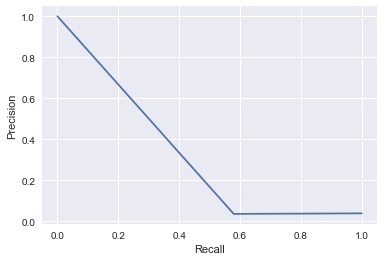

In [35]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(true_labels, pred_labels)
area = auc(recall, precision)
print "Area Under Curve: %0.2f" % area

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## OneClassSVM

For oneclassSVM, we need a training set that contains only the "normal" class

In [36]:
X_train = X[:6500,:]
y_train = y[:6500]
X_test = X[6500: , :]
y_test = y[6500:]

### Train

In [37]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(nu=0.01, kernel="poly")
ocsvm.fit(X_train)
pred_labels = ocsvm.predict(X_train)
true_labels = y_train

In [38]:
np.unique(pred_labels, return_counts=True)

(array([-1.,  1.]), array([6234,  266], dtype=int64))

In [39]:
print set(pred_labels)

set([1.0, -1.0])


In [40]:
pred_labels[pred_labels == 1] = 0
pred_labels[pred_labels == -1] = 1

In [41]:
print set(pred_labels)

set([0.0, 1.0])


In [42]:
np.unique(pred_labels, return_counts=True)

(array([ 0.,  1.]), array([ 266, 6234], dtype=int64))

In [43]:
np.unique(true_labels, return_counts=True)

(array([0], dtype=int64), array([6500], dtype=int64))

### Test

In [44]:
pred_labels = ocsvm.predict(X_test)
true_labels = y_test

In [45]:
np.unique(pred_labels, return_counts=True)

(array([-1.,  1.]), array([504,  23], dtype=int64))

In [46]:
pred_labels[pred_labels == 1] = 0
pred_labels[pred_labels == -1] = 1

In [47]:
print set(pred_labels)

set([0.0, 1.0])


In [48]:
np.unique(pred_labels, return_counts=True)

(array([ 0.,  1.]), array([ 23, 504], dtype=int64))

In [49]:
np.unique(true_labels, return_counts=True)

(array([0, 1], dtype=int64), array([256, 271], dtype=int64))

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print "Accuracy = ", accuracy_score(true_labels, pred_labels)
print "Precision = ", precision_score(true_labels, pred_labels)
print "Recall = ", recall_score(true_labels, pred_labels)
print "Confusion Matrix = \n", confusion_matrix(true_labels, pred_labels)

# Note the true positive metric 

Accuracy =  0.519924098672
Precision =  0.517857142857
Recall =  0.963099630996
Confusion Matrix = 
[[ 13 243]
 [ 10 261]]


Area Under Curve: 0.75


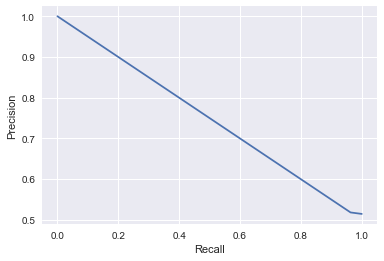

In [51]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(true_labels, pred_labels)
area = auc(recall, precision)
print "Area Under Curve: %0.2f" % area
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()